# Statistikk i Python 2

I denne delen vil vi fokusere på lineærregresjon.
Helt enkel, handler det om å finne en modell $\hat{y}$ som best beskriver datapunktene. I de tilfellene vi mistenker at dataen er lineær, vil vi tilpasse linjen:
$$\hat{y} = mx + b.$$
En veldig populær metode, er minste kvadraters metode. Hvor det handler om å minimere variansen mellom datapunktet $y_i$ og det estimerte datapunktet $\hat{y_i}$:

$$\textit{cost} = \sum_{i=1}^{n} (y_i - \hat{y_i})^2.$$
I dette tilfellet, blir variansen en $\textbf{kostfunksjon}$, og vi vil finne det stigningstallet og konstantleddet som gjør at den blir minst mulig. <br>
Måten man gjør det på er selvfølgelig derivasjon. Man partiellderiverer med hensyn på stigningstallet $m$ og konstantledd $b$, for å finne bunnpunktet til kostfunksjonen.

$$\frac{\partial \textit{cost}}{\partial m} = 0 \: \: \frac{\partial \textit{cost}}{\partial b} = 0 .$$

NB. 1 For en mer detaljert beskrivelse, se Squires s. 30

NB. 2 På side 39, får man hele algoritmen for minste kvadraters metode, svært nyttig. 

## LinearRegression1.py


I dette programmet undersøker vi motstands data fra tabell 4.2 side 34 i Squires. Som ser på sammenhengen mellom temperatur og motstand i en silikonprøve. I følge teorien som Squires presenterer på side 33, er forholdet mellom temperatur og motstand:

$$R = R_0 e^{T_0/T}.$$

Dette er ikke lineært, men vi kan få det lineært ved å transformere dem. Dvs. plotte $lnR$:

$$lnR =T_0/T + lnR_0 ,$$
mot $\frac{1}{T}$.

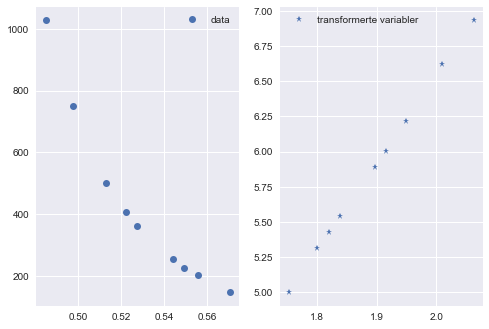

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#data hentet fra Table 4.2 side 34. Squires
T = np.array([570.6, 555.9, 549.4, 544.1, 527.3, 522.2, 513.1, 497.6, 484.9])/1000 #temperatur i K
R = np.array([148.1, 202.6, 227.1, 255.1, 362.0, 406.1, 502.5, 750.1, 1026.7]) #motstand i Ohm

#transformerer data for å få noe lineært
x = 1/T
y = np.log(R)


plt.style.use("seaborn")
plt.subplot(1,2,1)
plt.plot(T,R,"o",label="data")
plt.legend()
plt.subplot(1,2,2)
plt.plot(x,y,"*",label="transformerte variabler")
plt.legend()
plt.show()

Her ser vi tydelig at dataene blir lineære når vi har transformert dem. 
Det neste steget blir å finne en modell som passer. 
Til det bruker vi funksjonen linregress fra stats pakken til scipy. 
Den bruker minste kvadraters metode (nevnt over), for å tilpasse en linje til et datasett. <br>

Linregress returnerer:

LinregressResult(slope=6.22827923445122, intercept=-5.910297159240161,
rvalue=0.9998679481548884, pvalue=8.71137976427864e-14, stderr=0.03826038230685759,
intercept_stderr=0.0725401430250171)

De viktigste variablene er slope, intercept, stderr og intercept_stderr.

Slope og intercept er vi godt kjent med. Men stderr er standard error i stigningstallet, og intercept_stderr er standard error i konstantleddet. 

NB. For en beskrivelse av stderr og intercept_stderr se side 31-32 i Squires.

In [19]:
Y = stats.linregress(x,y)

Nå har vi stigningstallet og konstantleddet til modellen $\hat{y} = mx + b$, og kan ekstrapolere en linje, og se hvor godt vi har truffet:

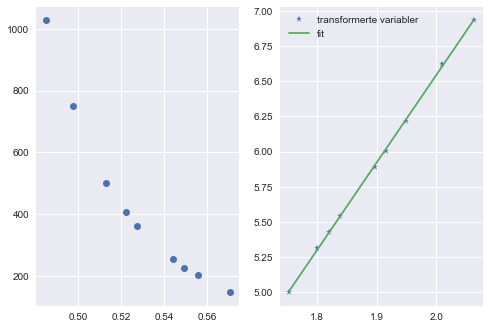

In [8]:
def line(x,m,b):
    return x*m + b
x_extra = np.linspace(min(x),max(x),100) 
y_extra = line(x_extra,Y.slope,Y.intercept) 

plt.subplot(1,2,1)
plt.plot(T,R,"o",label="data")
plt.subplot(1,2,2)
plt.plot(x,y,"*",label="transformerte variabler")
plt.plot(x_extra,y_extra,label="fit")
plt.legend()
plt.show()

Her ser vi at modellen treffer svært godt, og kan konkludere med at forholdet mellom 

$lnR$ og $\frac{1}{T}$ er lineært.

Nå har vi gjort en lineærtilpasning, men vi ønser å si noe kvantitativt om hvor
selvsikre vi er på estimeringen av stigningstall og konstantledd.
Vi vil bruke 68-95-99,7 regelen (se kompendiet om konfidensintervaller)

vi ønsker 95% sannsynlighet for at verdiene ligger innenfor et gitt intervall.
Derfor velger vi z = 1.96

Vi kan bruke formelen for konfidensintervall: 
$$y \pm z \cdot \frac{\sigma}{\sqrt n}.$$

Her er $\sigma$ standardavviket, og den kan vi tilnærme den med standard avviket til våre motstandsdata R. Da får vi:

$$y \pm z \cdot \frac{\textit{STD(R)}}{\sqrt n} \rightarrow y  \pm z \cdot SE(R).$$ 
Hvor SE(R) er standardfeilen til målingene.
NB. Vi går nærmere inn på konfidensintervaller i Statistikk i Python 3.


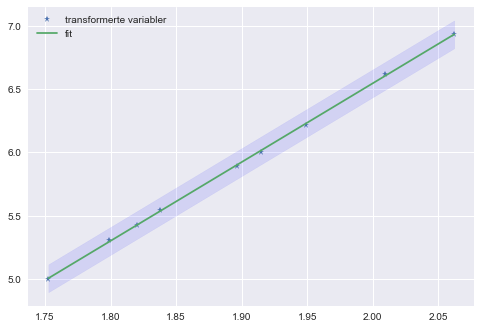

In [10]:
ci = 1.96* np.std(y_extra)/np.sqrt(len(y_extra))
plt.plot(x,y,"*",label="transformerte variabler")
plt.plot(x_extra,y_extra,label="fit")
plt.fill_between(x_extra, y_extra - ci , y_extra + ci,color = "b",alpha = 0.1)
plt.legend()
plt.show()

## Linearregression2.py 

I dette programmet ønsker vi å plotte residualene. M.a.o. differansen mellom predikert data, og faktisk data. Et slikt plot har de predikerte dataene på x-aksen og residualene på y-aksen. <br>

La oss lage en lineærtilpasning og et residual plot til de ubehandlede dataene.

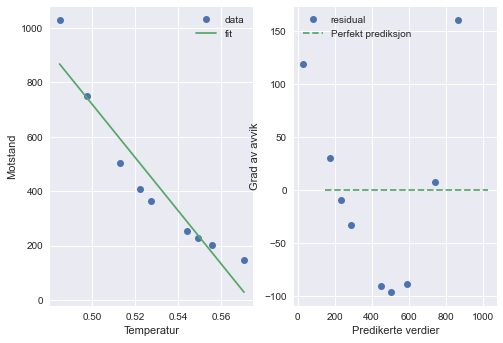

In [17]:
Y_raw = stats.linregress(T,R)
x_raw = np.linspace(min(T),max(T),100)
y_raw = np.polyval([Y_raw.slope, Y_raw.intercept],x_raw)
plt.subplot(121)
plt.plot(T,R,"o",label="data")
plt.plot(x_raw,y_raw,label="fit")
plt.xlabel("Temperatur")
plt.ylabel("Motstand")
plt.legend()

"""
Rent visuelt kan man tenke seg at en lineær modell ikke er så gal, men la oss
se hva residual plottet sier.
"""

predicted = np.polyval([Y_raw.slope,Y_raw.intercept],T)
residual = R - predicted

plt.subplot(122)
plt.plot(predicted,residual,"o",label = "residual")
plt.plot(R,np.zeros(len(x)),"--",label = "Perfekt prediksjon")
plt.xlabel("Predikerte verdier")
plt.ylabel("Grad av avvik")

plt.legend()
plt.show()

I dette tilfellet, er det tydelig at en lineær modell ikke passer til de ubehandlede dataene, og det kommer enda tydeligere frem i residualplottet på høyre side. Den striplede linjen representerer ingen forskjell mellom de predikerte verdiene og datapunktene. Vi kan se at residualene får en polynomlignende form.

La oss se hva som skjer dersom vi lager det samme residual plottet for de transformerte dataene.

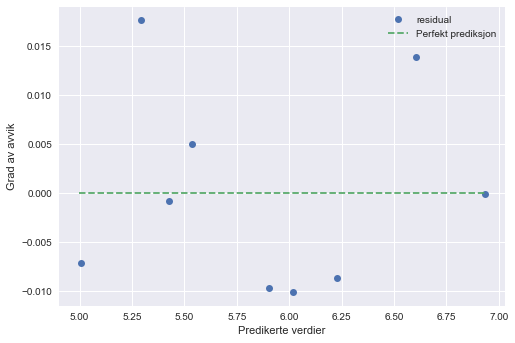

In [20]:
predicted = line(x,Y.slope,Y.intercept)
residual = y - predicted


plt.plot(predicted,residual,"o",label = "residual")
plt.plot(y,np.zeros(len(x)),"--",label = "Perfekt prediksjon")
plt.xlabel("Predikerte verdier")
plt.ylabel("Grad av avvik")

plt.legend()
plt.show()

Vi observerer avvikt rundt 1%, som er svært mye bedre enn tilfellet vi hadde over. Med det, kan vi med sikkerhet konkludere at en lineær modell er passelig for de transformerte dataene. 